In [41]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import nxviz as nv
import datetime
import pickle

# Notaciones básicas sobre grafos

Una red está compuesta principalmente por dos elementos:

* Nodos 

* Enlaces

Los nodos se conectan mediante enlaces, es decir, los enlaces nos permiten indicar en nuestra red si dos nodos se encuentran conectados.

# Creando una red básica mediante networkx

Python dispone de la librería **networkx** que nos permite analizar/crear grafos. Los comandos básicos para crear una red son los siguientes:

* **Graph()**: nos permiter crear nuestro grafo inicial.


* **add_nodes_from()**: nos permite agregar nodos a nuestra red. Como argumento de entrada recibe una lista de nodos.


* **nodes()**: nos permite visualizar los nodos agregados a nuestra red. Disponemos del argumento **data** que si toma el valor de True nos permite visualizar la información asociada a nuestro nodo. Retorna una lista con los nodos de nuestra red. Si el parámetro **data** toma el valor de True, retorna una lista de tuplas, donde el primer elemento de la tupla es el nodo y el segundo elemento es un diccionario con la información asociada al nodo.


* **add_edge()**: nos permite agregar enlaces entre nodos.


* **edges()**: nos permite visualizar los enlaces que existen entre nuestros nodos. También dispone del parámetro **data** que si toma el valor True, nos retorna información respecto al enlace. Nos retorna una lista de tuplas, cada tupla contiene dos elementos indicando las conexiones. Si el elemento **data** toma el valor de True, entonces nos retorna una lista de tuplas, donde los dos primeros elementos de la tupla son los nodos conectados y el tercer elemento de la tupla es un diccionario que contendrá tantas parejas clave-valor, como de elementos dependa el enlace.

A continuación vamos a proceder a crear una red básica, esta red estará compuesta por tres nodos, de los cuales dos de ellos estarán conectando por un enlace simple.

In [2]:
#Nos creamos nuestro grafo básico
G = nx.Graph()

#Agregamos tres nodos a nuestra red
G.add_nodes_from([1,2,3])

#Comprobamos que los nodos se agregaron
print('Lista de nodos:  %s' % G.nodes())

#Comprobamos la info asociada a los nodos, en este caso debería ser vacía ya que no tienen ningún tipo de info
print('Info nodos: %s' % G.nodes(data = True))

#Agregamos una conexión entre el nodo y el 2
G.add_edge(1,2)

#Comprobamos que los enlaces se agregaron, deberíamos tener una lista con la tupla (1,2), ya que estos han sido los
#nodos conectados
print('Lista de enlaces: %s' % G.edges())

#Vemos la info de nuestros enlaces, en nuestro caso debería estar vacía.
print('Info enlaces: %s' % G.edges(data = True))

Lista de nodos:  [1, 2, 3]
Info nodos: [(1, {}), (2, {}), (3, {})]
Lista de enlaces: [(1, 2)]
Info enlaces: [(1, 2, {})]


# Visualizaciones básicos haciendo uso de Networkx

Una vez tenemos nuestra red básica creada podemos visualizar dichar red, para ello además de Networkx necesitamos hacer uso de la librería **Matplotlib**. Networkx dispone del comando **draw()**, que junto con matplotlib nos permite visualizar redes básicas.

/home/francisco/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/francisco/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
/home/francisco/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
/home/francisco/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands ad

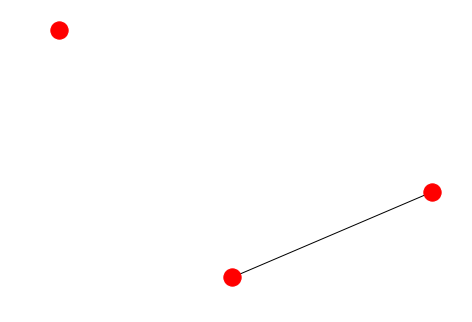

In [3]:
#Hacemos uso de la función draw()
nx.draw(G)

#Visualizamos el resultado
plt.show()

Aquí podemos ver nuestra red, donde como podemos ver está compuesta por tres nodos, dos de ellos conectados por un simple enlace.

# Cargando ficheros de redes ya creadas

En determinadas ocasiones, es posible que no tengamos que crear nuestra red desde cero, es decir, se nos proporcionen ficheros que contienen la estructura de una red. En este caso, nuestro objetivo podría ser analizar nuestra red, uno de los archivos más comunes a la hora de proporcionar redes son los denominados archivos **pickle**. Network dispone de **read_gpickle()** que nos permite extraer la información. Como argumento principal recibe el path donde se encuentra el fichero que deseamos cargar.

In [4]:
#Cargamos nuestra red ya creada
n_twitter = nx.read_gpickle('ego-twitter.p')

Una vez tenemos nuestra red cargamos podemos visualizar los nodos, enlaces, info asociada a nodos y enlaces etc.

In [5]:
#Vemos el número de nodos que componen nuestra red
print('Num nodos red : %d' %len(n_twitter.nodes()))

#Vemos la info asociada a nuestros  10 primeros nodos
n_twitter.nodes(data = True)[0:10]

Num nodos red : 23369


[(1, {'category': 'I', 'occupation': 'scientist'}),
 (3, {'category': 'P', 'occupation': 'politician'}),
 (4, {'category': 'D', 'occupation': 'celebrity'}),
 (5, {'category': 'I', 'occupation': 'politician'}),
 (6, {'category': 'D', 'occupation': 'politician'}),
 (7, {'category': 'D', 'occupation': 'scientist'}),
 (8, {'category': 'I', 'occupation': 'celebrity'}),
 (9, {'category': 'D', 'occupation': 'celebrity'}),
 (10, {'category': 'I', 'occupation': 'celebrity'}),
 (11, {'category': 'I', 'occupation': 'celebrity'})]

Como podemos ver nuestros nodos están compuestos por categoría y por ocupación.

In [6]:
#Vemos el número de enlaces en nuestra red
print('Num enlaces red : %d' % len(n_twitter.edges()))

#Vemos la info asociada a 10 de los enlaces en nuestra red
n_twitter.edges(data = True)[0:10]

Num enlaces red : 33142


[(1, 3, {'date': datetime.date(2012, 11, 17)}),
 (1, 4, {'date': datetime.date(2007, 6, 19)}),
 (1, 5, {'date': datetime.date(2014, 3, 18)}),
 (1, 6, {'date': datetime.date(2007, 3, 18)}),
 (1, 7, {'date': datetime.date(2011, 12, 19)}),
 (1, 8, {'date': datetime.date(2013, 12, 7)}),
 (1, 9, {'date': datetime.date(2009, 11, 9)}),
 (1, 10, {'date': datetime.date(2008, 10, 7)}),
 (1, 11, {'date': datetime.date(2008, 8, 14)}),
 (1, 12, {'date': datetime.date(2011, 3, 22)})]

En este caso podemos ver como cada enlace está asociado mediante el campo date.

# Obteniendo información de nuestra red

Una vez tenemos nuestro fichero de red cargado, una de las cosas que deberíamos realizar es el de analizar nuestra red, es decir, extraer información interesante, tanto de nuestros nodos como de nuestros enlaces, para ello una de los elementos más usados son las lista comprimidas.

In [17]:
#Obtener los nodos en los que el campo occupation sea scientist
nodes_sct = [nodo for nodo, info in n_twitter.nodes(data = True) if info['occupation'] == 'scientist']

#Vemos el número de nodos que cumplen esto
print('Num occupation como scientist : %d' % len(nodes_sct))

#Obtener los enlaces en las que se cumpla que la fecha de enlace entre los nodos es inferior a enero del año 2010
nodes_enlyr_low2010 = [(nodo1, nodo2) for nodo1,nodo2, info in n_twitter.edges(data = True) if info['date'] < date(2010,1,1)]

#Vemos el número de enlaces inferioes a dicha fecha
print('Num fecha enlace inferior 01-01-2010 : %d' % len(nodes_enlyr_low2010))

Num occupation como scientist : 7999
Num fecha enlace inferior 01-01-2010 : 12458


# Tipos de redes o grafos 

Dentro de la redes podemos diferenciar entre redes no dirigidas y redes dirigidas. Las redes no dirigidas son aquellas en las que el enlace es no dirigido, un ejemplo claro es la red de facebook. Cuando dos personas son amigas es que ambas están conectadas. Las redes dirigidas puede darse el caso de que un nodoA esté conectado con un nodoB pero el nodoB no esté conectado con el nodoA. Por ejemplo, twitter se trata de una red dirigida, ya que una personaA puede seguir a una personaB, pero la personaB no tiene por qué seguir a la personaA. Dentro de las redes dirigidas tenemos las redes MutilGraph, este tipo de redes se da, cuando un nodo es conectado con otro mediante múltiples enlaces, por ejemplo, si nuestra red hace referencia a la conexión de vuelos entre aeropuertos, nuestro nodoA que es Madrid y nuestro nodoB que es Londres, será un MultiGraph, ya que entre ambos nodos existirán tantos enlaces como vuelos existan entre Madrid y Londres. Este tipo de grafos suelen ser computacionalmente muy costosos, por lo que suelen comprimir en un solo enlace, mediante pesos, por ejemplo podríamos tener un solo enlace que indicase el número de vuelos que conectan Madrid con Londres. Finalmente es posible situaciones de enlaces que salgan de un mismo nodo y terminen en un mismo nodo. Por ejemplo, si nuestro grafo es sobre redes de transportes urbanas, podría existir dicho enlace, ya que un autobús termina una ruta donde la comenzó.

# Chequeando el tipo de red/grafo

A la hora de ver que tipo de gráfico tenemos entre manos, podemos hacer uso de la función **type()**.

In [18]:
print(type(n_twitter))

<class 'networkx.classes.digraph.DiGraph'>


En este caso podemos ver como retorna el tipo DiGraph, esto nos indica que estamos ante un gráfico **DiGraph** (gráfico dirigido).

# Asignando pesos a un enlace

Como hemos indicado, podemos especificar pesos a los enlaces, de forma que además de reducir la memoria necesaria para representar nuestro grafo, podemos indicar por ejemplo la fuerza que tiene un determinado enlace

In [20]:
#Indicamos un peso de 2 al enlace entre los nodos 1-10
n_twitter.edge[1][10]['weight'] = 2

#Iteramos sobre todos los enlaces y si el nodo 293 aparece en un determinado enlace cambiamos su pesos a 1.1
for u,v,d in n_twitter.edges(data = True):
    if 293 in [u,v]:
        n_twitter.edge[u][v]['weight'] = 1.1

# Chequeando el número de nodos que tienen auto-enlaces

Como ya se ha indicado anteriormente un nodo puede tener un enlace asignado a él mismo. Es importante en una red conocer que nodos tienen este tipo de enlace, ya que nos puede aportar una gran cantidad de información.

In [21]:
def find_selfloop_nodes(red):
    '''Función que nos permite encontrar todos los nodos que tienen auto-enlaces'''
    nodes_in_selfloops = []
    for u,v in red.edges():
        if u == v:
            nodes_in_selfloops.append(u)
    return nodes_in_selfloops

In [22]:
assert n_twitter.number_of_selfloops() == len(find_selfloop_nodes(n_twitter))

# Visualizando haciendo uso de MatrixPlots

Cuando queremos visualizar redes realmente complejas, el paquete **Networkx** no nos permite realizar gráficos lo suficientemente potentes. El paquete **nxviz** si nos permite realizar una serie de gráficos que nos permiten visualizar nuestra red. Para hacer esto el paquete **nxviz** proporciona el objeto **MatrixPlot**. Bajo el paquete **nxviz** hace uso de **nx.to_numpy_matrix(G)**, que retorna una matriz para poder montar el grafo. En esta matriz cada nodo queda representado por una columna y una fila, de forma que si existe enlace entre dos nodos su casilla correspondiente tomará el valor de 1. Una cosa que debemos de tener claro es que al representar nuestra red de esta forma todos los metadatos asociados a nuestra red se perderán, excepto el peso asociado a nuestro enlace. Por defecto el tipo de grafo que se genera es no dirigido, si deseamos representar un gráfico de tipo dirigido debemos de hacer uso de **nx.from_numpy_matrix(A, create_using=nx.DiGraph)** donde A es una matriz que se obtiene a partir de la expresión **nx.to_numpy_matrix()**.

Puesto que la red completa contiene una gran cantidad de información, vamos a proceder a realizar una subselección de la red completa.

In [134]:
with open('info_enlaces.pkl', 'wb') as f:
    pickle.dump(info_enlaces, f)


In [136]:
#Cargamos los nodos y la info asociada a los nodos 
with open('nodos.pkl', 'rb') as file:
    nodos = pickle.load(file)
    
with open('info_nodos.pkl', 'rb') as file:
    info_nodos = pickle.load(file)

    
#Cargamos la info asociada a los enlaces
with open('enlaces.pkl', 'rb') as file:
    enlaces = pickle.load(file)
    
with open('info_enlaces.pkl', 'rb') as file:
    info_enlaces = pickle.load(file)

In [144]:
#Creamos nuestro gráfico de tipo GRaph
twitter = nx.Graph()

#Agregamos los nodos a nuestra red
twitter.add_nodes_from(nodos)

#Agregamos la info a nuestro nodo
for nodo, d in info_nodos:
    twitter.node[nodo] = d

#Agregamos los enlaces a nuestra red
twitter.add_edges_from(enlaces)

for u,v,d in info_enlaces:
    twitter[u][v] = d

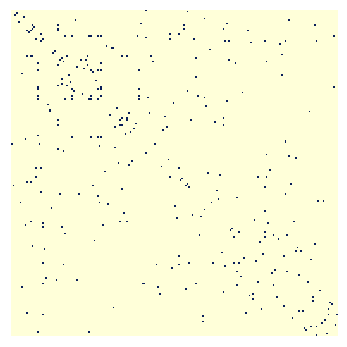

In [146]:
#Nos creamos un objeto de tipo MatrixPlot
m = nv.MatrixPlot(twitter)

#Nos creamos nuestro draw
m.draw()

#Vemos el resultado 
plt.show()

#Convertimos a tipor numpy
A = nx.to_numpy_matrix(twitter)

T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

In [147]:
#Comprobamos que los metadatos asociados a category no se encuentran en nuestra T_conv
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

# Visualizando haciendo uso de los gráficos CircosPlot

Los gráficos de tipo **CircosPlot** nos permiten visualizar nuestra red de una forma clara y bastante agradable a la vista de los usuarios.

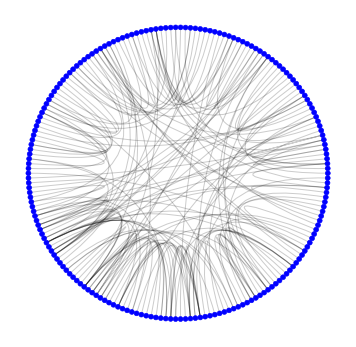

In [158]:
#Creamos nuestro objeto de tipo CircosPlot
c = nv.CircosPlot(twitter)

#Generamos el draw
c.draw()

#Vemos el resultado 
plt.show()

# Visualizando haciendo uso de los gráficos de tipo Arc Plots

A continuación vamos a proceder a realizar un gráfico de tipo ArcPlot.

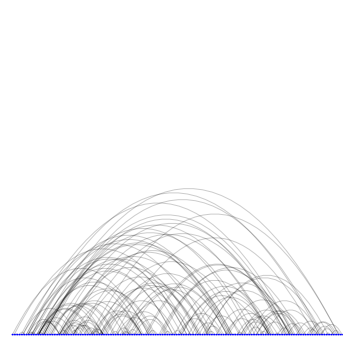

In [159]:
#Nos creamos un objeto de tipo ArcPlot
a = nv.ArcPlot(twitter)

#Nos generamos el draw
a.draw()

#Vemos el resultado
plt.show()

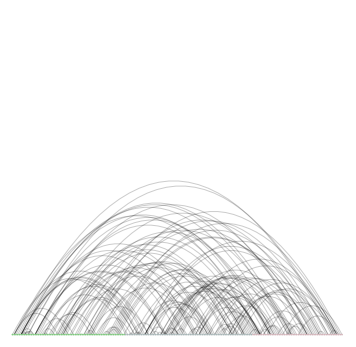

In [160]:
#Podemos mejorar nuestro gráfico agregando colores
a2 = nv.ArcPlot(twitter, node_order = 'category', node_color = 'category')

#Generamos el draw
a2.draw()

#Vemos el resultado
plt.show()